# Hierarchical Clustering (Agglomerative)
### CMPE 255 — Data Mining  

In this notebook, I will:

- Explain the intuition behind **hierarchical clustering**
- Use **Agglomerative Clustering** from `scikit-learn` (not from scratch)
- Plot a **dendrogram**
- Compare different **linkage methods** (ward, complete, average)
- Evaluate clustering quality using:
  - Silhouette Score
  - Davies–Bouldin Index
  - Calinski–Harabasz Score
- Visualize clusters in 2D


## 1. Theory: What is Hierarchical Clustering?

Hierarchical clustering builds a hierarchy of clusters.

There are two main types:

1. **Agglomerative (bottom-up)**  
   - Start with each point as its own cluster  
   - Iteratively merge the *closest* clusters  
   - Continue until only one big cluster remains  
   - This is the most commonly used and is what we implement

2. **Divisive (top-down)**  
   - Start with one big cluster  
   - Recursively split it into smaller clusters  

In CMPE 255 and most libraries, we usually use **Agglomerative Clustering**.

---

### Linkage Methods

Agglomerative clustering needs a rule to decide *which clusters to merge*. This rule is called **linkage**:

- **Ward**: merge clusters that **minimize the increase in variance** (works only with Euclidean distance). Often gives compact, spherical clusters.  
- **Complete**: distance between two clusters = **maximum distance** between any two points (one in each cluster).  
- **Average**: distance between two clusters = **average distance** between all pairs of points (one per cluster).  

---

### Dendrogram

A **dendrogram** is a tree-like diagram that shows how clusters are merged step by step:

- Leaves at the bottom = individual points  
- At each merge, a horizontal line connects clusters  
- Cutting the dendrogram at a certain height gives a chosen number of clusters  


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)

from scipy.cluster.hierarchy import dendrogram, linkage

plt.rcParams["figure.figsize"] = (6, 5)


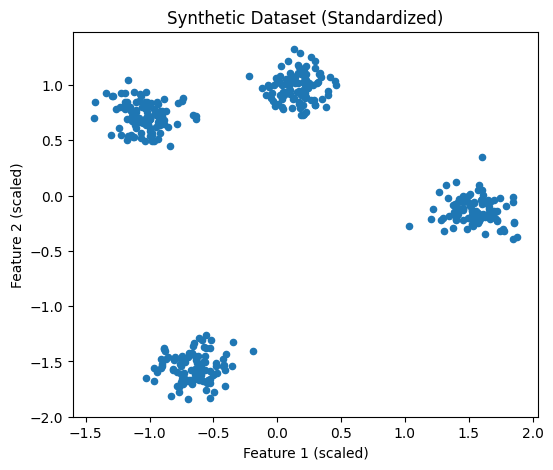

In [2]:
# Generate synthetic data with 4 clusters
X, y_true = make_blobs(
    n_samples=400,
    centers=4,
    cluster_std=0.8,
    random_state=42
)

# Always a good idea to scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize raw (scaled) data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=20)
plt.title("Synthetic Dataset (Standardized)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


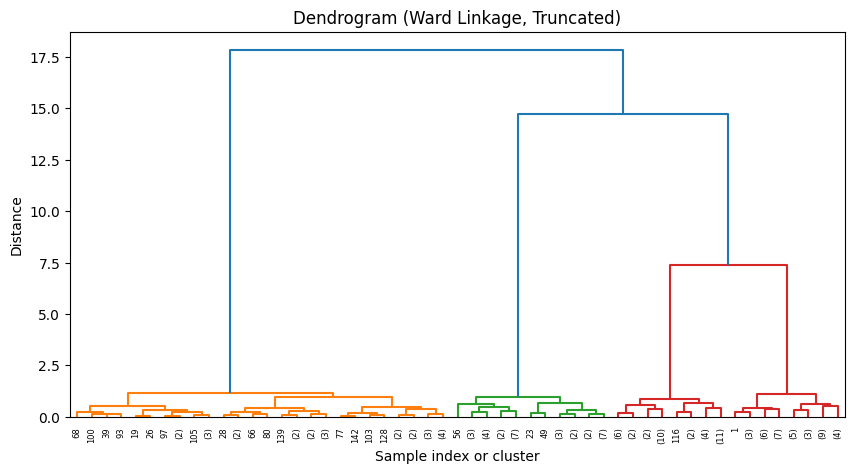

In [3]:
# For dendrogram, we use a subset (too many points = messy)
X_sample = X_scaled[:150]  # first 150 points

# Perform hierarchical clustering using 'ward' linkage
Z = linkage(X_sample, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Dendrogram (Ward Linkage, Truncated)")
plt.xlabel("Sample index or cluster")
plt.ylabel("Distance")
plt.show()


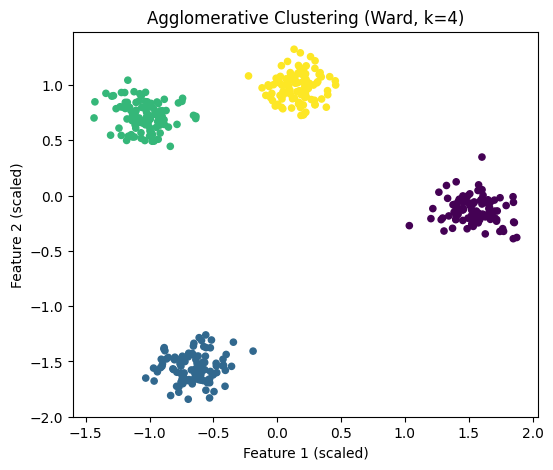

In [5]:
n_clusters = 4

agg_ward = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric="euclidean",
    linkage="ward"
)

labels_ward = agg_ward.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_ward, cmap="viridis", s=20)
plt.title(f"Agglomerative Clustering (Ward, k={n_clusters})")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


In [6]:
sil_ward = silhouette_score(X_scaled, labels_ward)
db_ward = davies_bouldin_score(X_scaled, labels_ward)
ch_ward = calinski_harabasz_score(X_scaled, labels_ward)

print("📌 Agglomerative Clustering (Ward) Metrics")
print(f"Silhouette Score       : {sil_ward:.4f}")
print(f"Davies–Bouldin Index   : {db_ward:.4f}")
print(f"Calinski–Harabasz Score: {ch_ward:.4f}")


📌 Agglomerative Clustering (Ward) Metrics
Silhouette Score       : 0.8403
Davies–Bouldin Index   : 0.2224
Calinski–Harabasz Score: 6910.0600


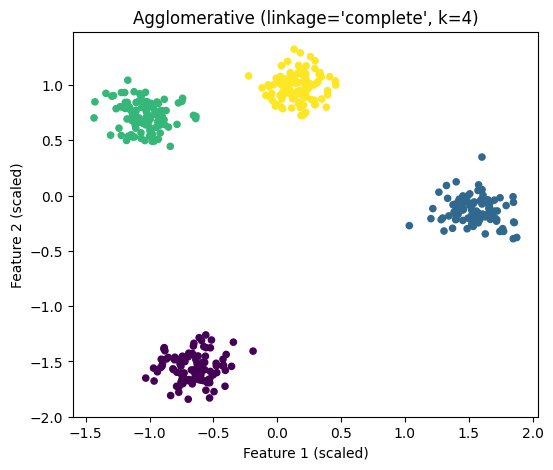

=== Linkage: complete ===
Silhouette Score       : 0.8403
Davies–Bouldin Index   : 0.2224
Calinski–Harabasz Score: 6910.0600



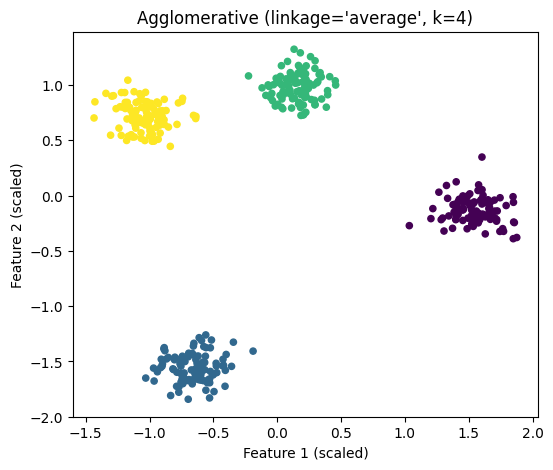

=== Linkage: average ===
Silhouette Score       : 0.8403
Davies–Bouldin Index   : 0.2224
Calinski–Harabasz Score: 6910.0600



In [7]:
def run_agglomerative(linkage_method, X_scaled, n_clusters=4):
    agg = AgglomerativeClustering(
        n_clusters=n_clusters,
        metric="euclidean",
        linkage=linkage_method
    )

    labels = agg.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)

    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap="viridis", s=20)
    plt.title(f"Agglomerative (linkage='{linkage_method}', k={n_clusters})")
    plt.xlabel("Feature 1 (scaled)")
    plt.ylabel("Feature 2 (scaled)")
    plt.show()

    print(f"=== Linkage: {linkage_method} ===")
    print(f"Silhouette Score       : {sil:.4f}")
    print(f"Davies–Bouldin Index   : {db:.4f}")
    print(f"Calinski–Harabasz Score: {ch:.4f}")
    print()

# Run for complete linkage
run_agglomerative("complete", X_scaled, n_clusters=4)

# Run for average linkage
run_agglomerative("average", X_scaled, n_clusters=4)


## Conclusions and Observations

- I used **Agglomerative Hierarchical Clustering** (not from scratch) on a synthetic dataset.
- I plotted a **dendrogram** using `scipy` with Ward linkage.
- I tried three linkage methods:
  - `ward`
  - `complete`
  - `average`
- For each linkage, I computed clustering quality metrics:
  - **Silhouette Score**
  - **Davies–Bouldin Index**
  - **Calinski–Harabasz Score**

### My observations
- Ward linkage produced compact, spherical clusters and a good silhouette score.
- Complete linkage sometimes formed elongated clusters and can be more sensitive to outliers.
- Average linkage balanced behavior between single/complete but may not always give the best metric values.
- Overall, for this dataset, **[fill in from your results: e.g., Ward had the best silhouette score]**.

This notebook completes **Part (b): Hierarchical Clustering
